In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import numpy as np #importing necessary libraries

#Data Overview

###Quick glance at the data

In [ ]:
train = pd.read_csv("trainHP.csv") #importing dataset
test = pd.read_csv("testHP.csv")

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Here we can see that we have: 38 numerical attributes and 43 categorical attributes. There are also some columns with missing values but we will deal with them later

Let's investigate the relations between attributes

###Graphs

C:\Users\uzer2\AppData\Local\Temp\ipykernel_17960\1315542628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

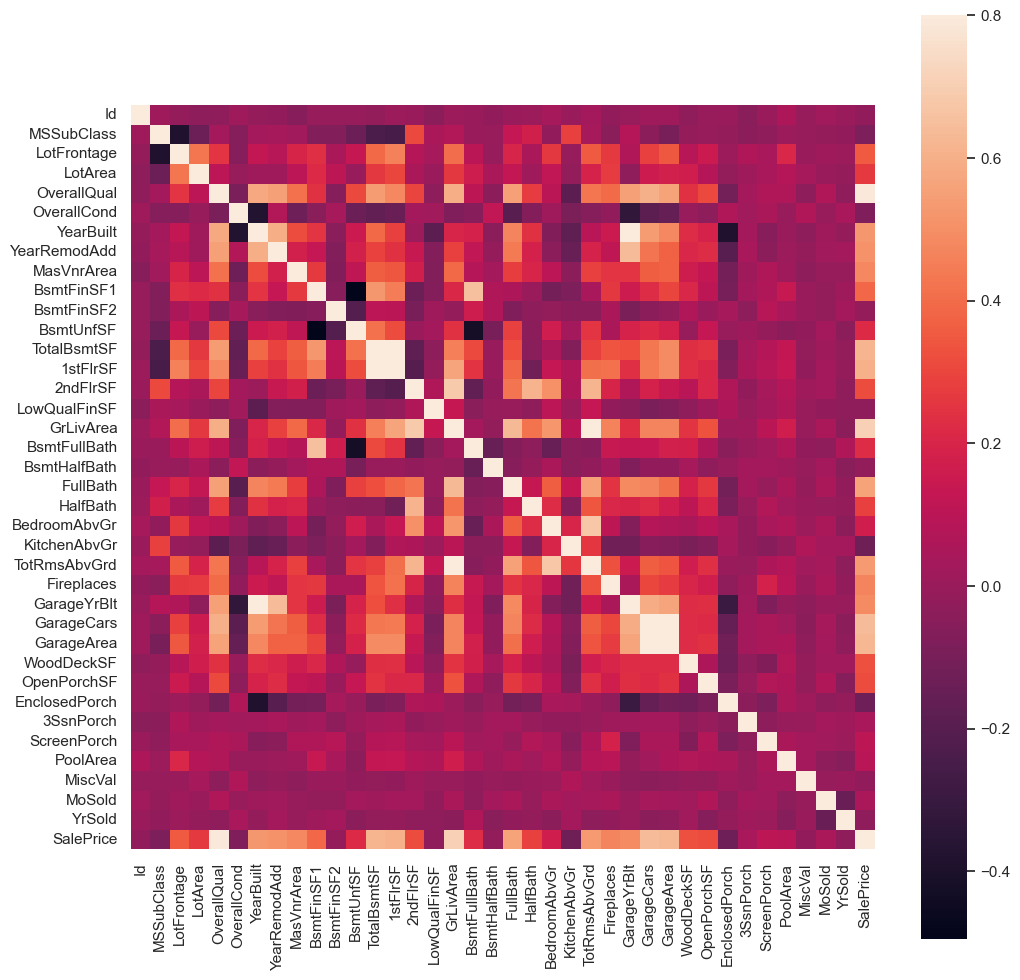

In [ ]:
corrmat = train.corr() #we will plot corellation matrix
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, vmax=.8, square=True)

From this correlation matrix we can obtain some valuable information about some of the relations:
    1. Overall quality and GrLivArea is higly correlated with the target attribute - SalePrice
    2. Some of the attributes are also correlated: GrLivArea and TotRmsAbsGrd, YearBuilt and GarageYrBlt (obviously), Garage attributes (obviously too), etc

In [ ]:
corr_sp = train.corr()["SalePrice"]
corr_sp.sort_values(ascending=False)

C:\Users\uzer2\AppData\Local\Temp\ipykernel_17960\1850235174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_sp = train.corr()["SalePrice"]


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: >

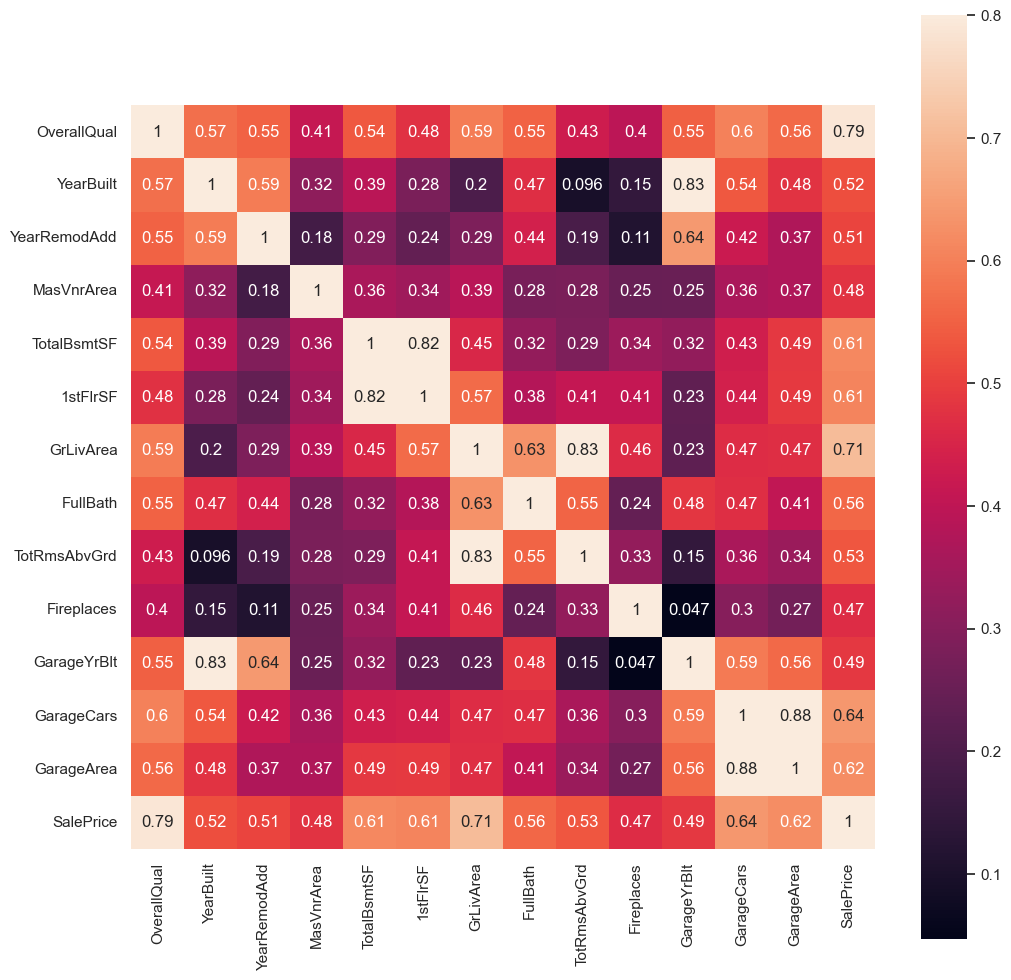

In [ ]:
high_corr = train.loc[:,corr_sp[corr_sp>0.4].index] #let`s plot strongly correlated features
plt.figure(figsize=(12,12))
sns.heatmap(high_corr.corr(), vmax =.8, annot=True, square=True)

There are some strong realtionships between some independent varriables:
    1. YearBulit - GarageYrBlt
    2. GarageArea - GarageCars
    3. TotalBSMTSF - 1stFlrSF
    4. GrLivArea - TotRmsAbvGrd

Due to the fact that every attribute pair 1, 2 and 3 have nearly the same corr coefficcient we can just choose 1 attribute (with higher coef) from each pair that will stay.
Others will be dropped to avoid multicollinearity.

Let's investigate the fourth pair

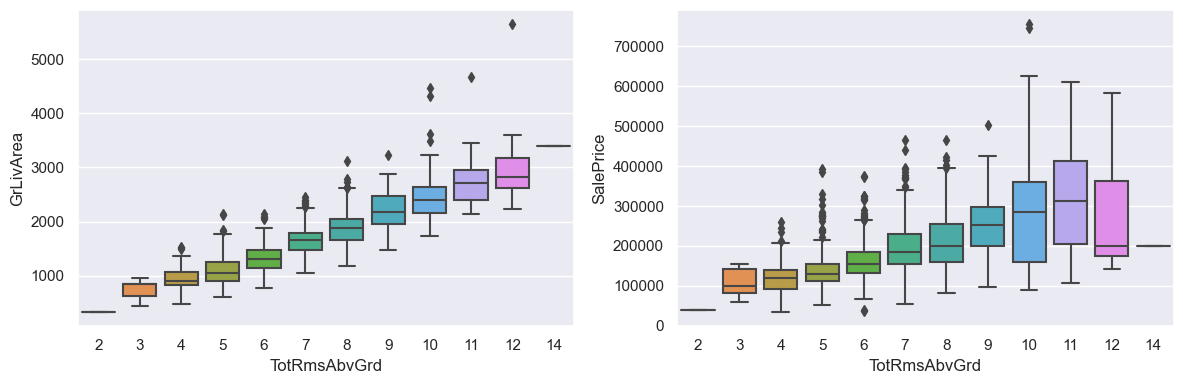

In [ ]:
plt.figure(figsize=(12,4))
#Subplot 1: TotRmsAbvGrd vs GrLivArea
plt.subplot(1,2,1)
sns.boxplot(y="GrLivArea", x="TotRmsAbvGrd", data=train)
#Subplot 2: TotRmsAbvGrd vs SalePrice
plt.subplot(1,2,2)
sns.boxplot(y="SalePrice", x="TotRmsAbvGrd", data=train)
plt.tight_layout()
plt.show()

In the second graph we can see that saleprice drops when there is >=12 rooms above the ground. Why is it so?

In [ ]:
train[train["TotRmsAbvGrd"]>=12].SalePrice

185     475000
635     200000
769     538000
803     582933
897     142953
910     154300
1031    197000
1173    200500
1230    190000
1298    160000
1350    200000
1386    250000
Name: SalePrice, dtype: int64

We have only 12 objects with >= 12 rooms in the house and I suppose that there are outliers among them. If we start dropping outliers from dataset, it will result in
even smaller number of objects with >= 12 rooms, which will only add noise to our model predictions. So, let's drop TotRmsAbvGrd as well

In [ ]:
chosen_num = corr_sp.drop(index=["GarageYrBlt", "GarageArea", "1stFlrSF", "TotRmsAbvGrd", "Id"])

In [ ]:
chosen_num

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
Fireplaces       0.466929
GarageCars       0.640409
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

Let's look through categorical variables

In [ ]:
categorical_att = [col for col in train.columns if train[col].dtype == object]

In [ ]:
categorical_att

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Let's use mutual information regression to find realtions between SalePrice and categorical attributes

C:\Users\uzer2\AppData\Local\Temp\ipykernel_17960\1802289578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat[att], _ = train_cat[att].factorize()
C:\Users\uzer2\AppData\Local\Temp\ipykernel_17960\1802289578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cat[att], _ = train_cat[att].factorize()
C:\Users\uzer2\AppData\Local\Temp\ipykernel_17960\1802289578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Text(0.5, 1.0, 'Mutual Information Scores')

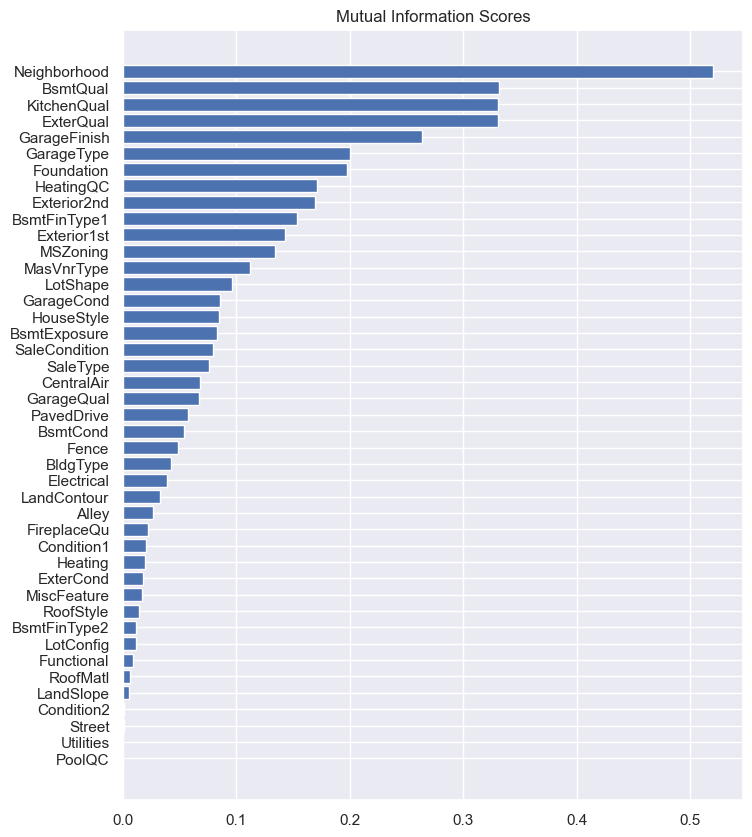

In [ ]:
train_cat = train[categorical_att]
for att in categorical_att:
  train_cat[att], _ = train_cat[att].factorize()
mi_sc = mutual_info_regression(train_cat, train["SalePrice"], discrete_features=train_cat, random_state=0)
mi_sc = pd.Series(mi_sc, index=train_cat.columns).sort_values(ascending=True)
width = np.arange(len(mi_sc))
ticks = list(mi_sc.index)
plt.figure(dpi=100, figsize=(8, 10))
plt.barh(width, mi_sc)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")


Let's analyze Neighborhood

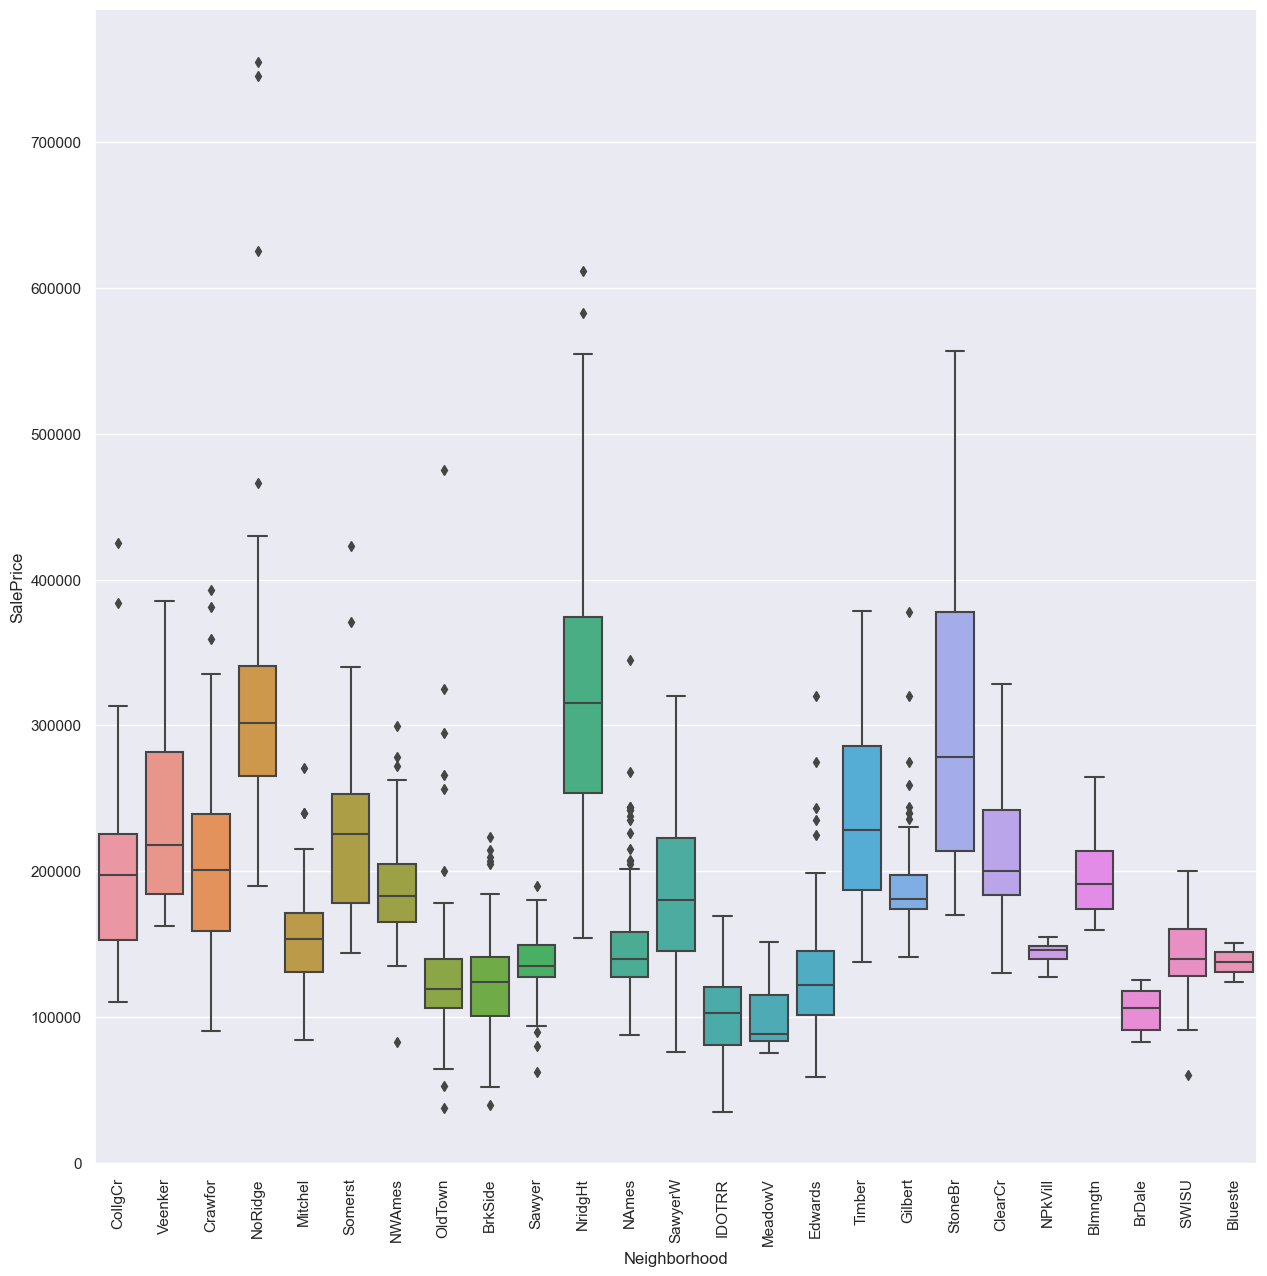

In [ ]:
plt.figure(figsize=(15,15)) #Neighborhood vs SalePrice
sns.boxplot(x="Neighborhood", y ="SalePrice", data=train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

As it can be seen above, there is a relation between neighborhood and sale price

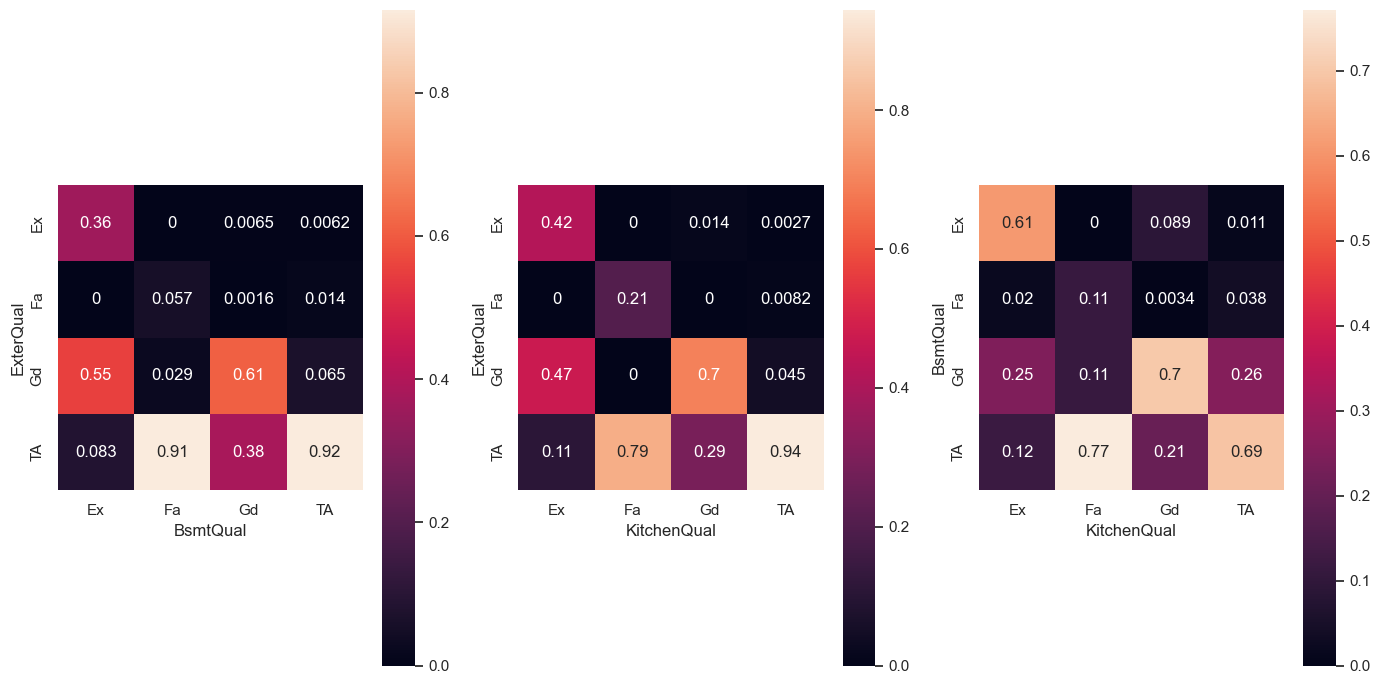

In [ ]:
#Analyzing Quality features with correlation matrices
atts = ["ExterQual", "BsmtQual", "KitchenQual"]
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
cont_table = pd.crosstab(train[atts[0]], train[atts[1]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(1,3,2)
cont_table = pd.crosstab(train[atts[0]], train[atts[2]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(1,3,3)
cont_table = pd.crosstab(train[atts[1]], train[atts[2]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.tight_layout()
plt.show()

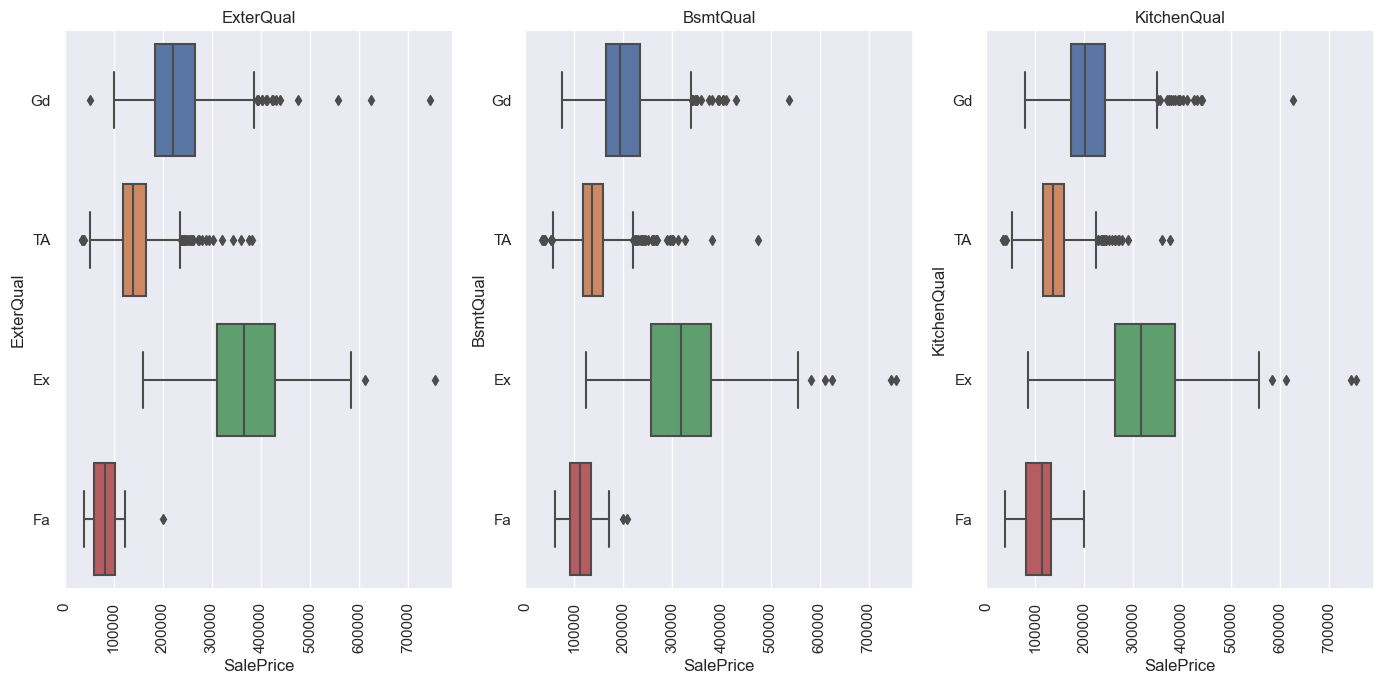

In [ ]:
#Analyzing Quality features vs SalePrice with boxplots
plt.figure(figsize=(14,7))
for i, att in enumerate(atts):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = train["SalePrice"], y = train[att])
    plt.title(att)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

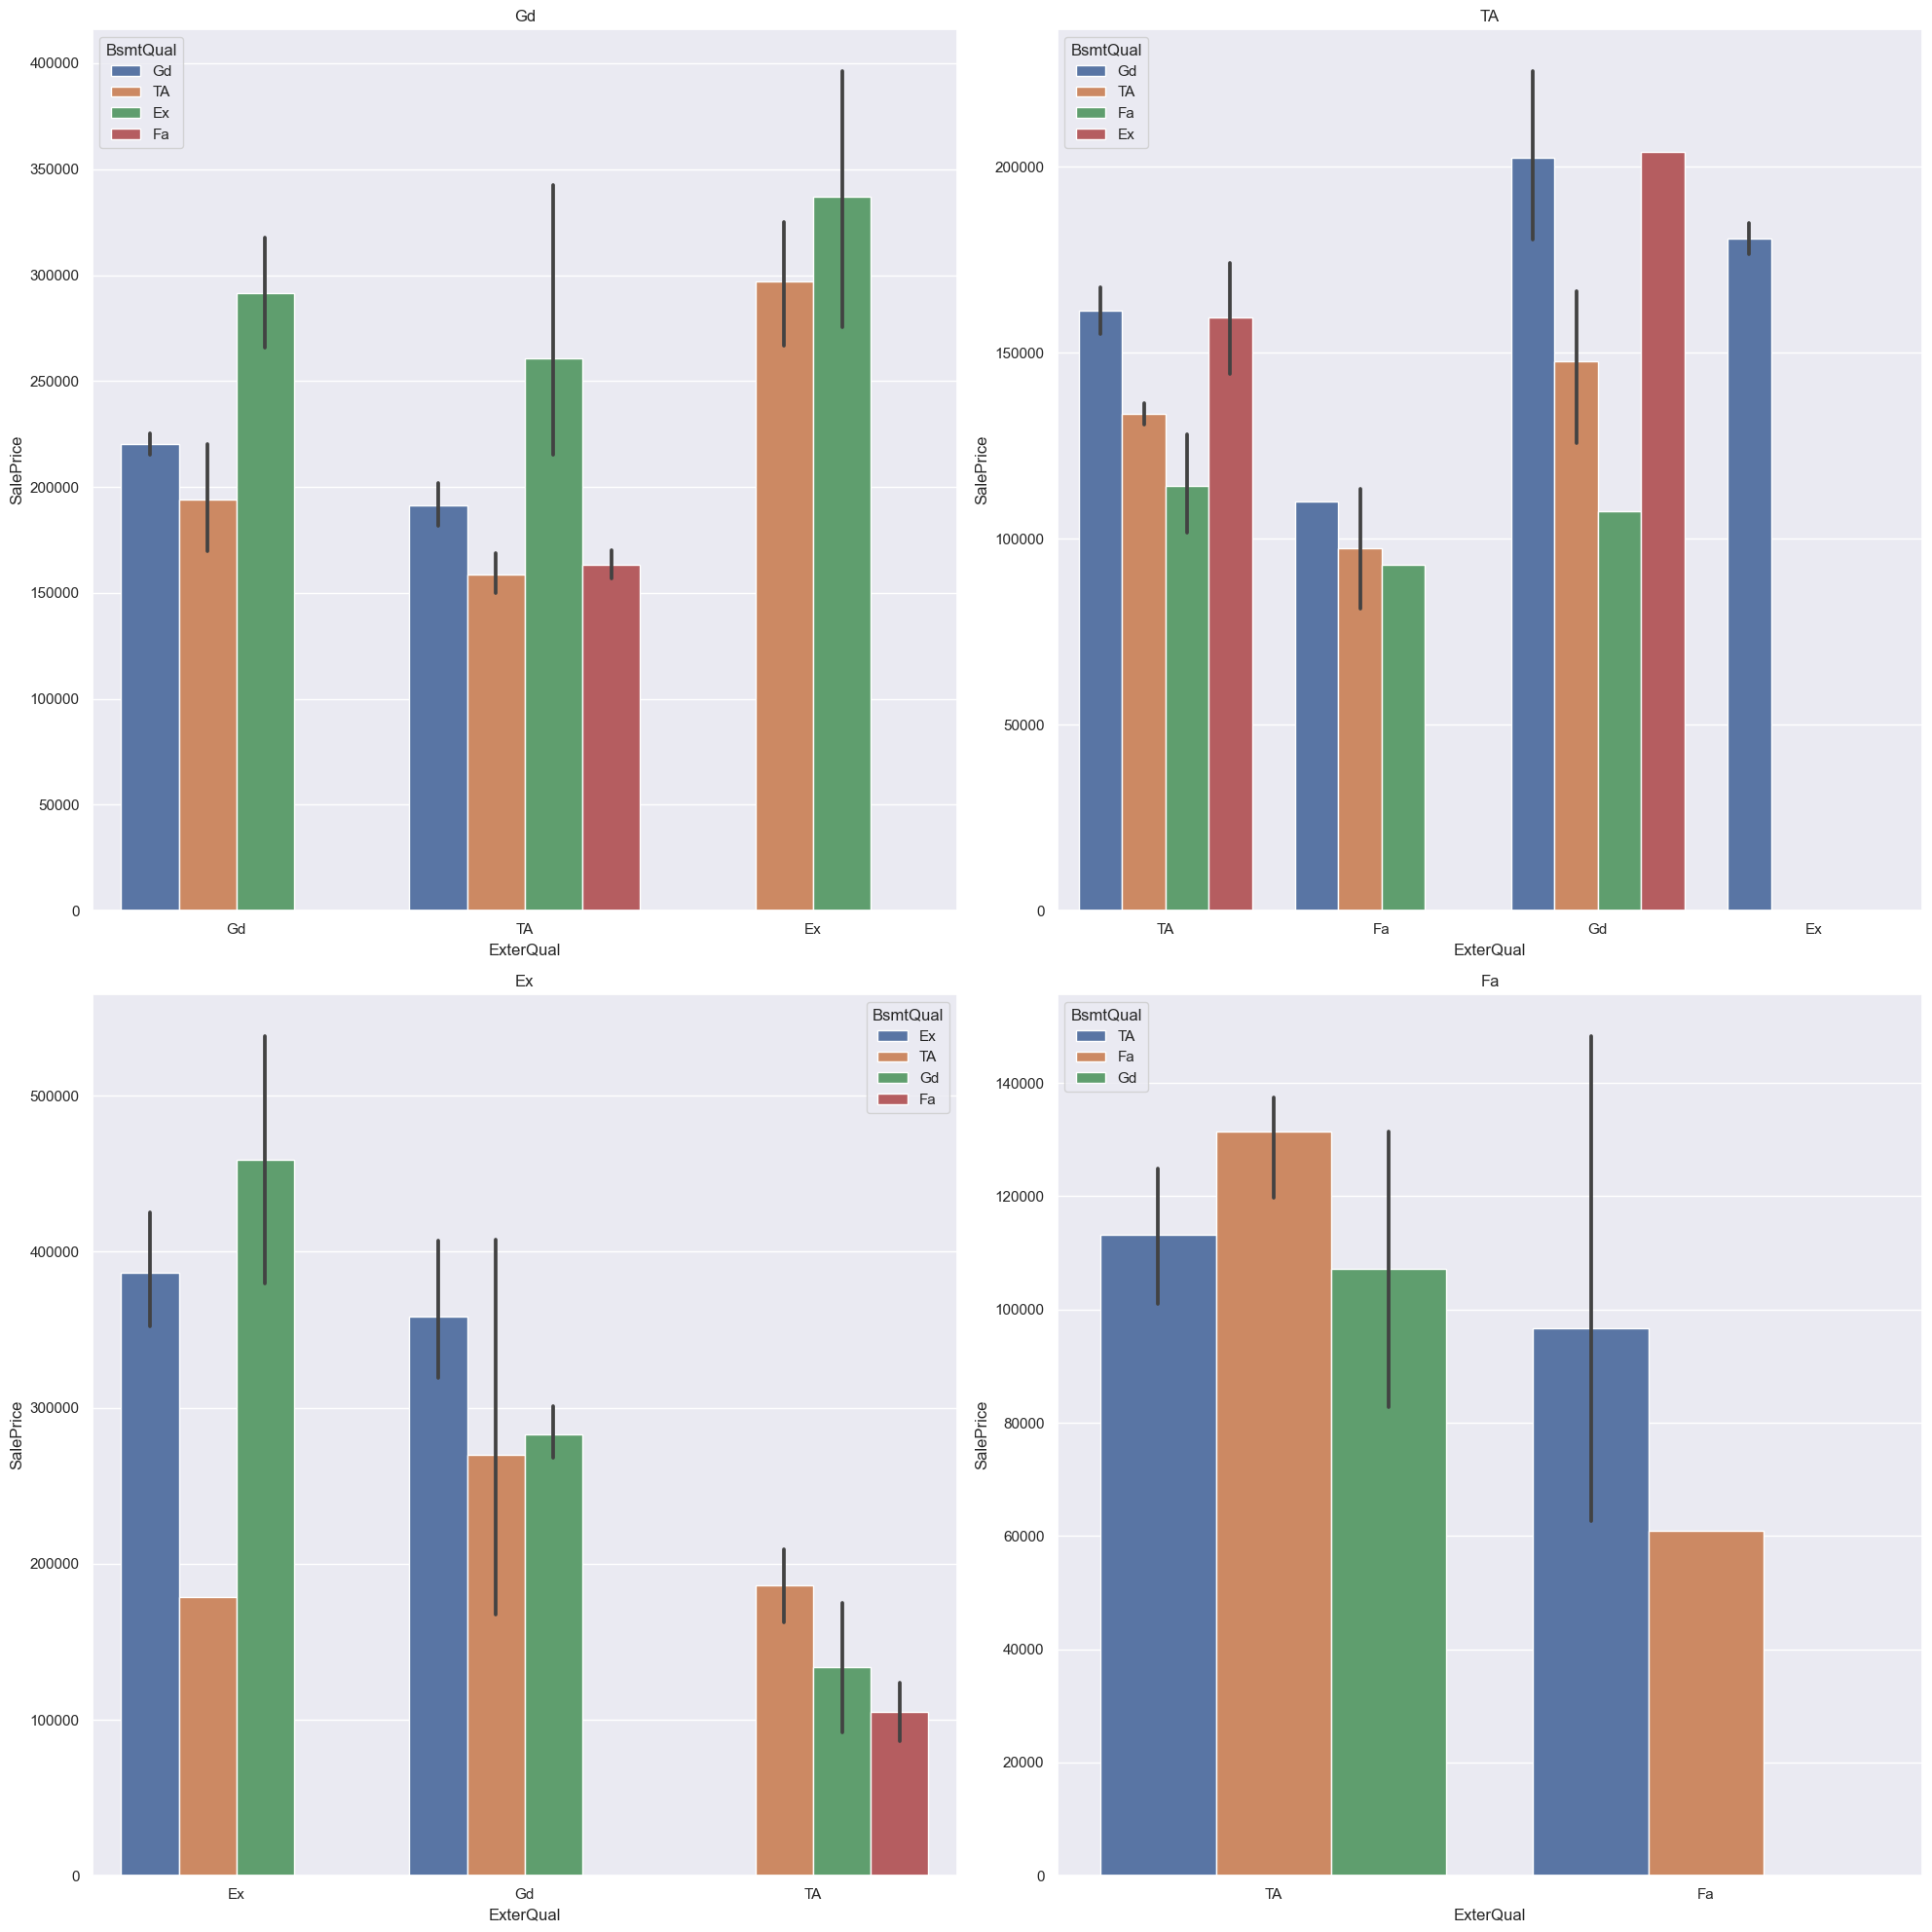

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
for i, cond in enumerate(train.KitchenQual.unique()): #4-dimensional graph with KitchenQual + ExterQual + BsmtQual vs SalePrice
    ax = axes[i // 2, i % 2]
    BM = train["KitchenQual"] == cond
    wdf = train[BM]
    sns.barplot(x="ExterQual", y="SalePrice", data=wdf, hue="BsmtQual", ax=ax)
    ax.set_title(cond)

plt.tight_layout()
plt.show()

Let's now look at attributes associated with garage: GarageFinish, GarageType, GarageCond, GarageQual

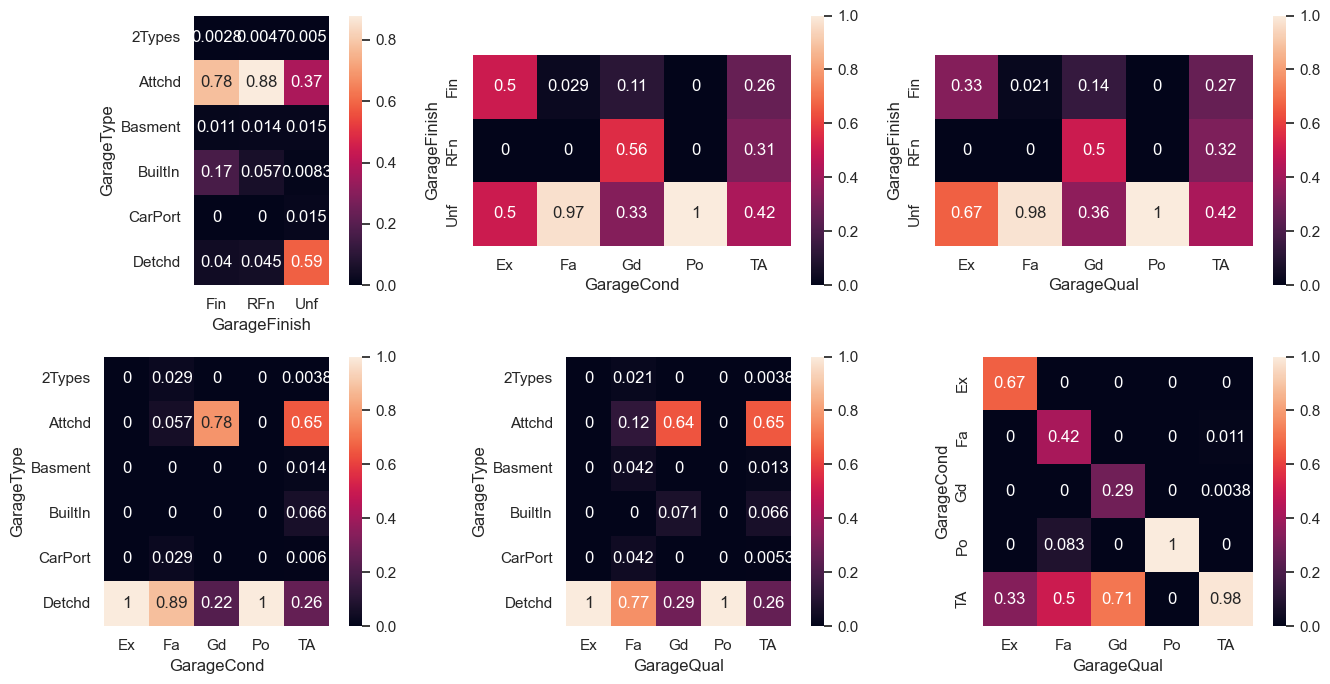

In [ ]:
atts = ['GarageFinish', 'GarageType', 'GarageCond', 'GarageQual']
plt.figure(figsize=(14,7)) #correlation matrices
plt.subplot(2,3,1)
cont_table = pd.crosstab(train[atts[1]], train[atts[0]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(2,3,2)
cont_table = pd.crosstab(train[atts[0]], train[atts[2]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(2,3,3)
cont_table = pd.crosstab(train[atts[0]], train[atts[3]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(2,3,4)
cont_table = pd.crosstab(train[atts[1]], train[atts[2]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(2,3,5)
cont_table = pd.crosstab(train[atts[1]], train[atts[3]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.subplot(2,3,6)
cont_table = pd.crosstab(train[atts[2]], train[atts[3]])
cont_table = cont_table/cont_table.sum()
sns.heatmap(cont_table, annot=True, square=True)

plt.tight_layout()
plt.show()

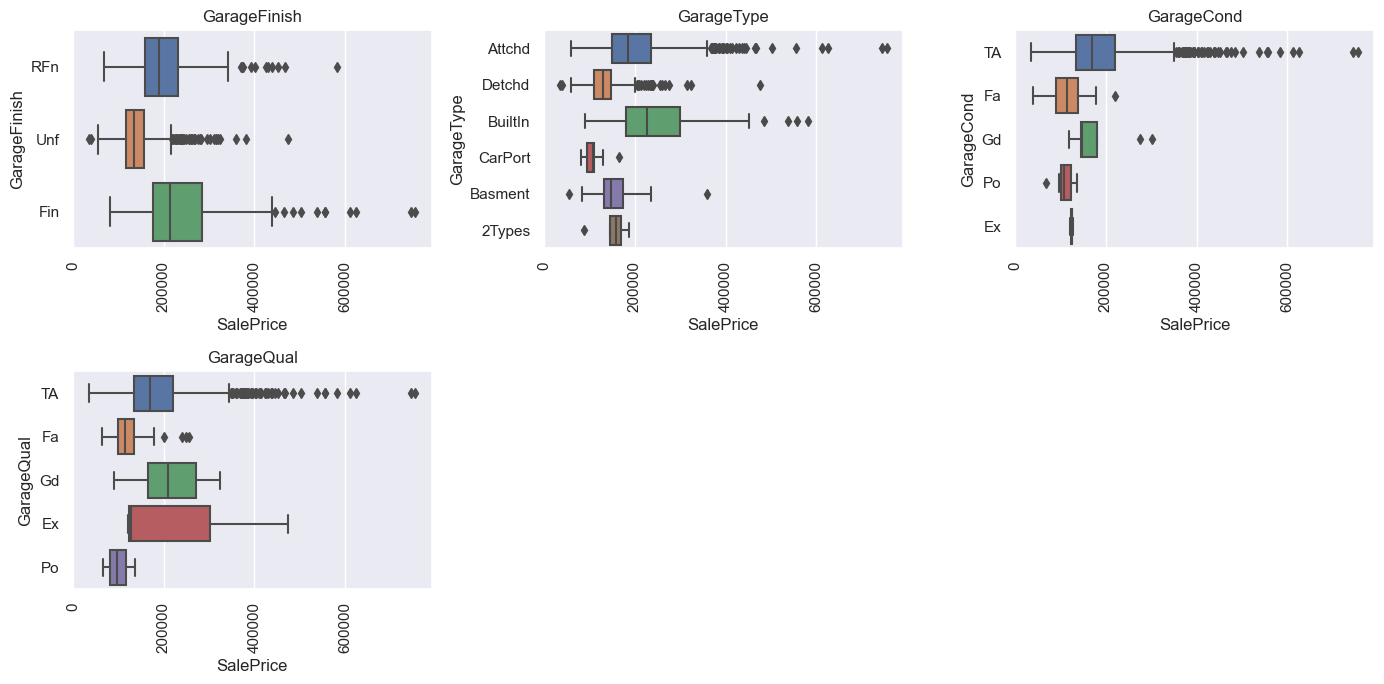

In [ ]:
plt.figure(figsize=(14,7)) #boxplots
for i, att in enumerate(atts):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = train["SalePrice"], y = train[att])
    plt.title(att)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

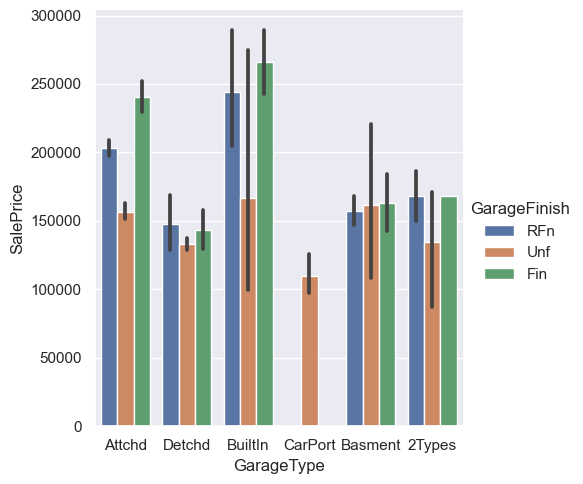

In [ ]:
sns.catplot(x="GarageType",y="SalePrice",data=train,hue="GarageFinish",kind='bar') #3-dimensional bar-plot

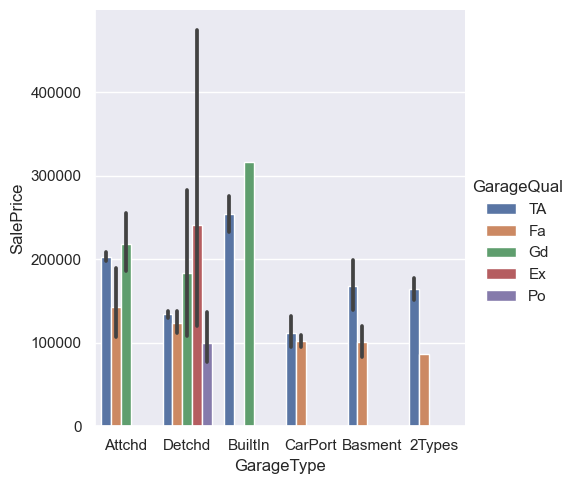

In [ ]:
sns.catplot(x="GarageType",y="SalePrice",data=train,hue="GarageQual",kind='bar') #3-dimensional bar-plot

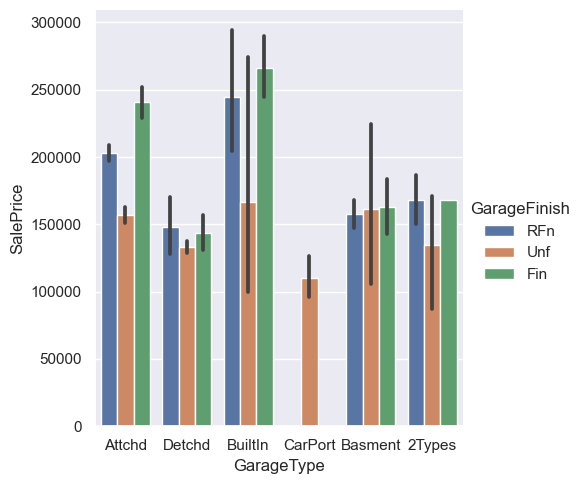

In [ ]:
sns.catplot(x="GarageType",y="SalePrice",data=train,hue='GarageFinish',kind='bar') #3-dimensional bar-plot

We move on to basement attributes

In [ ]:
atts = ["BsmtQual", "BsmtFinType1", "BsmtExposure", "BsmtCond", "BsmtFinType2"] #choosing features for analysis

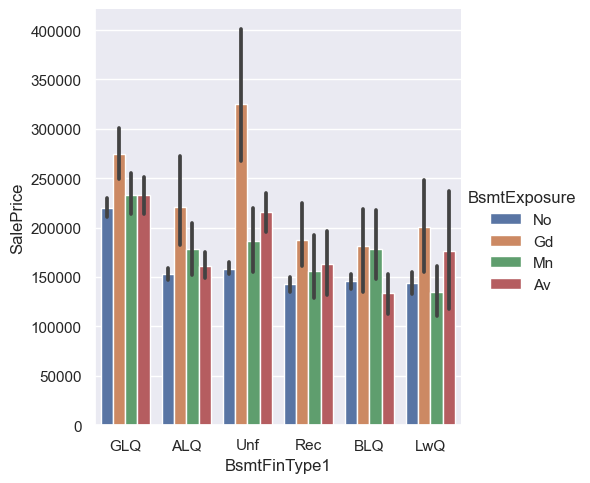

In [ ]:
sns.catplot(x="BsmtFinType1",y="SalePrice",data=train,hue="BsmtExposure",kind='bar')

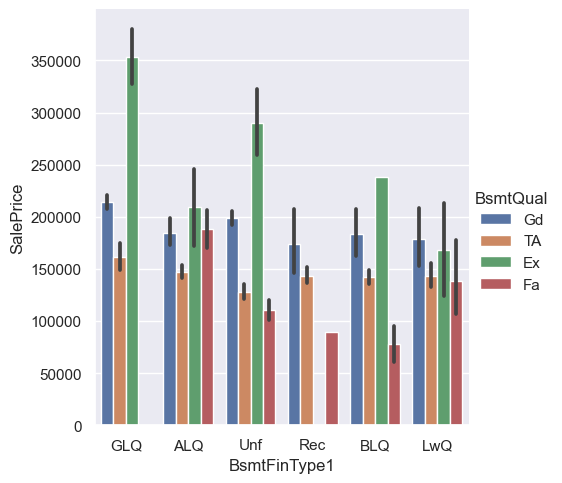

In [ ]:
sns.catplot(x="BsmtFinType1",y="SalePrice",data=train,hue="BsmtQual",kind='bar')

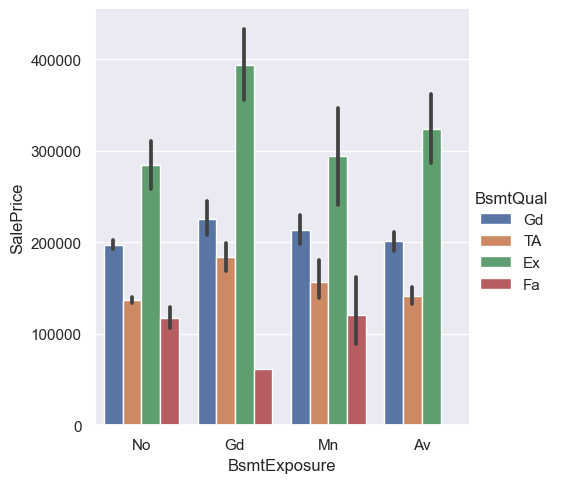

In [ ]:
sns.catplot(x="BsmtExposure",y="SalePrice",data=train,hue="BsmtQual",kind='bar')

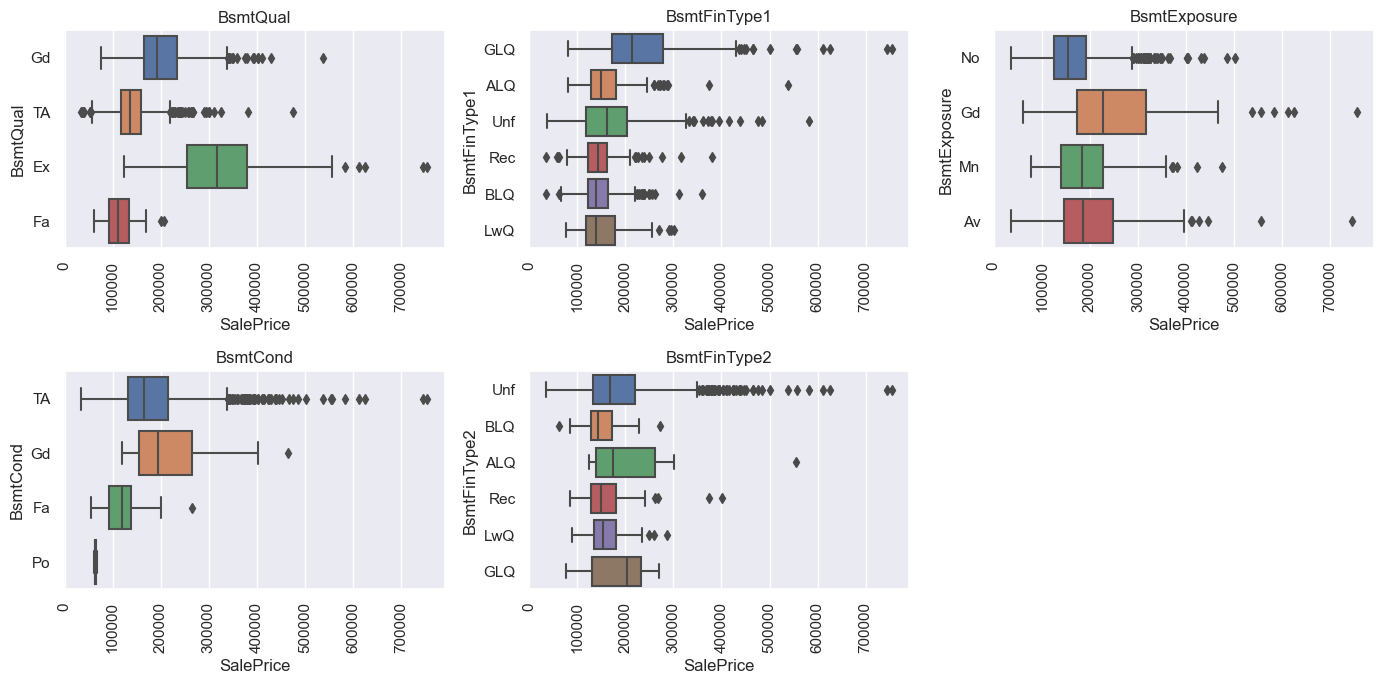

In [ ]:
plt.figure(figsize=(14,7)) #some boxplots
for i, att in enumerate(atts):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = train["SalePrice"], y = train[att])
    plt.title(att)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
chosen_cat = mi_sc.index #list of chosen categorical attribute for model training

In [ ]:
chosen_num = chosen_num.index #list of chosen numerical attribute for model training

In [ ]:
chosen_num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

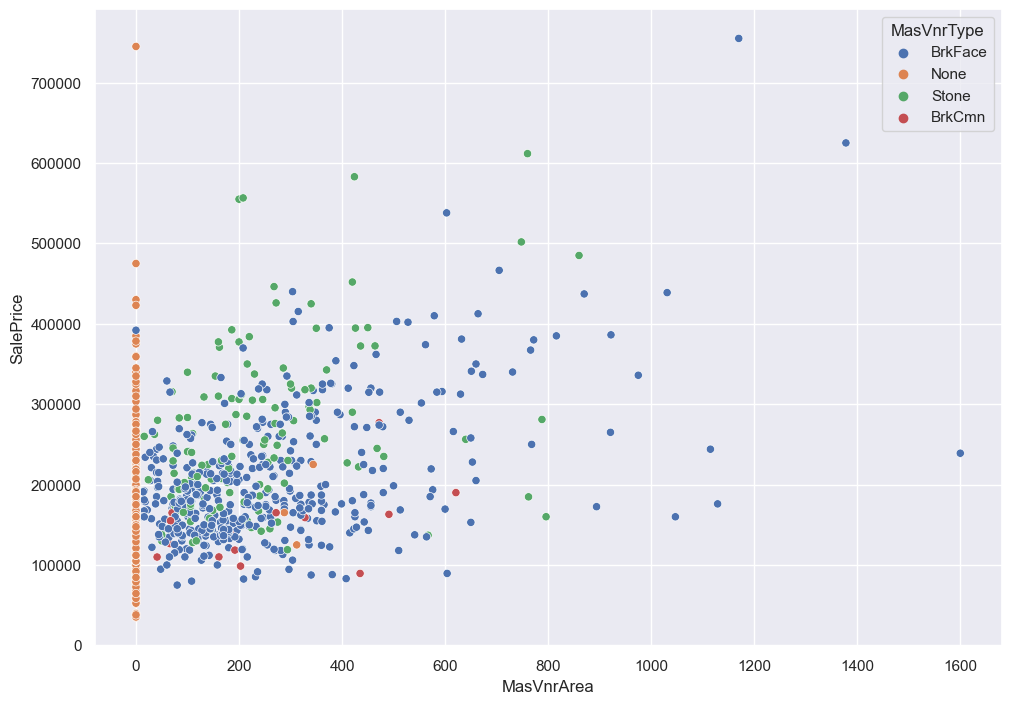

In [ ]:
sns.scatterplot(x='MasVnrArea',y="SalePrice",data=train,hue='MasVnrType') #MasVnrArea vs SalePrice scatterplot

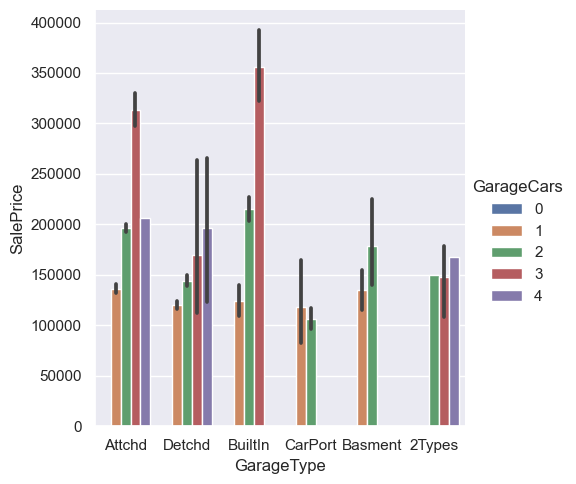

In [ ]:
sns.catplot(x='GarageType',y="SalePrice",data=train,hue='GarageCars',kind='bar') #GarageType + GarageCars vs SalePrice

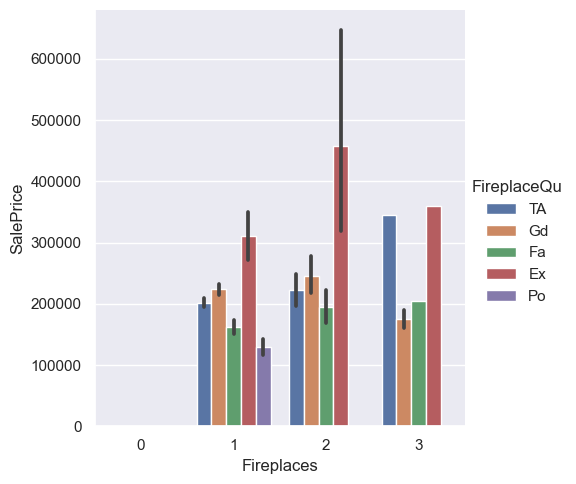

In [ ]:
sns.catplot(x='Fireplaces',y="SalePrice",data=train,hue='FireplaceQu',kind='bar') #Firaplace attributes (Fireplaces + FireplaceQu) vs SalePrice

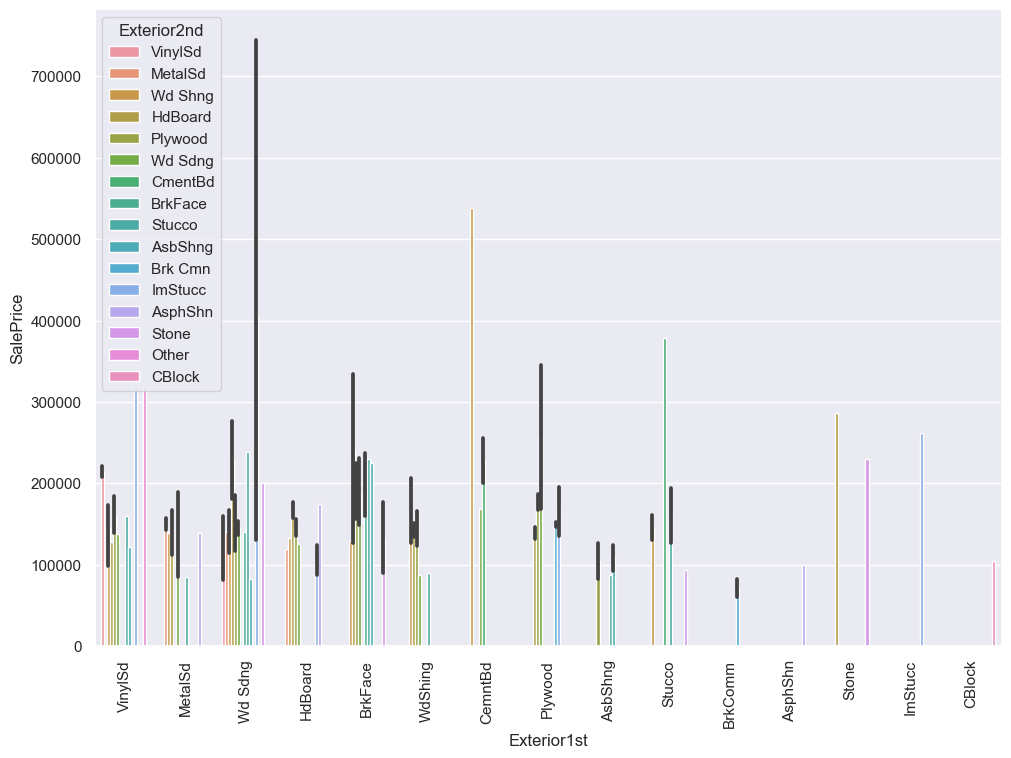

In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Exterior1st',y="SalePrice",data=train,hue='Exterior2nd') #Exterior1st + Exterior2nd vs SalePrice
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

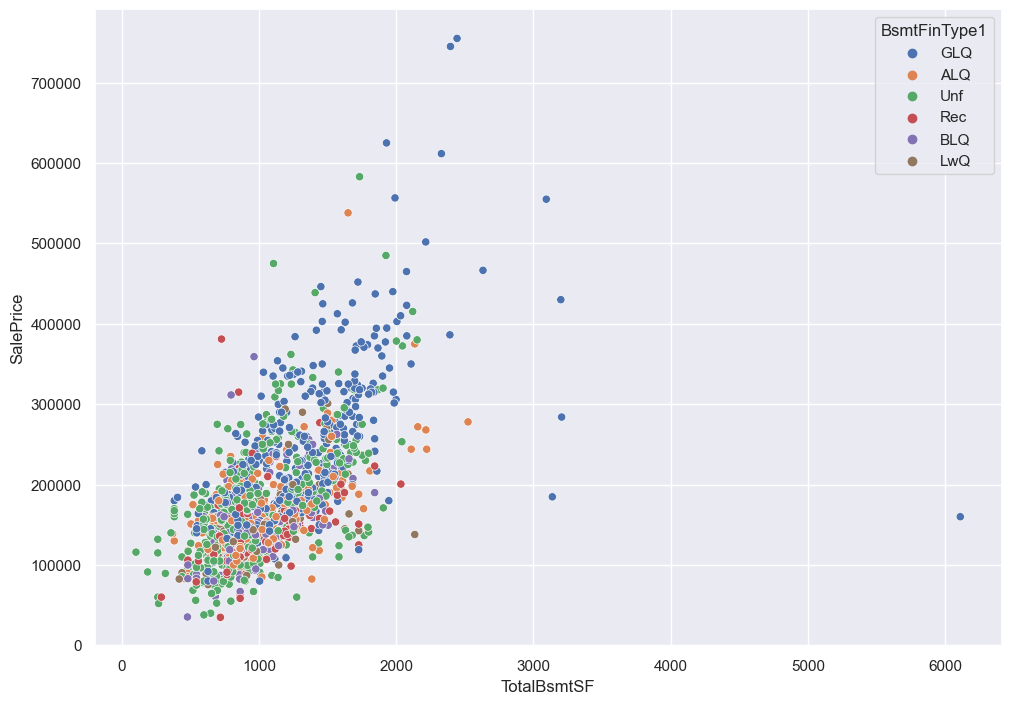

In [ ]:
sns.scatterplot(x='TotalBsmtSF',y="SalePrice",data=train,hue='BsmtFinType1') #Basement attributes (TotalBsmtSF + BsmtFinType1) vs SalePrice

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

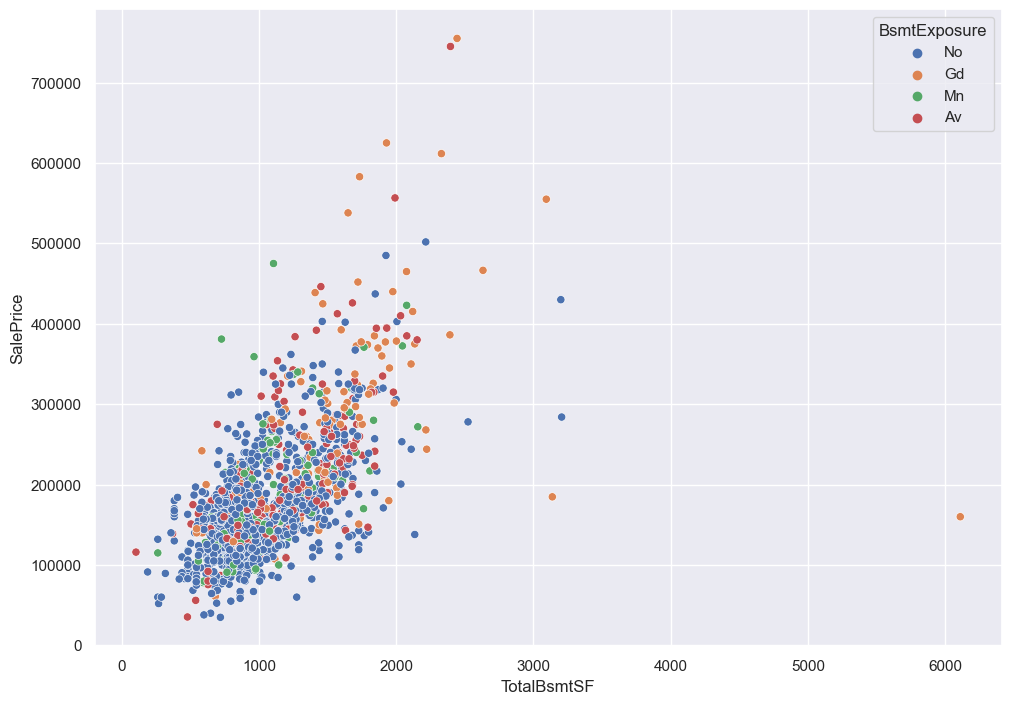

In [ ]:
sns.scatterplot(x='TotalBsmtSF',y="SalePrice",data=train,hue='BsmtExposure') #Basement attributes (TotalBsmtSF + BsmtExposure) vs SalePrice

I think that at this point we can finish with chossing attributes and turn our attention to data transformation

#Data Preprocessing

First of all, I want to look at the target attribute

<Axes: ylabel='Frequency'>

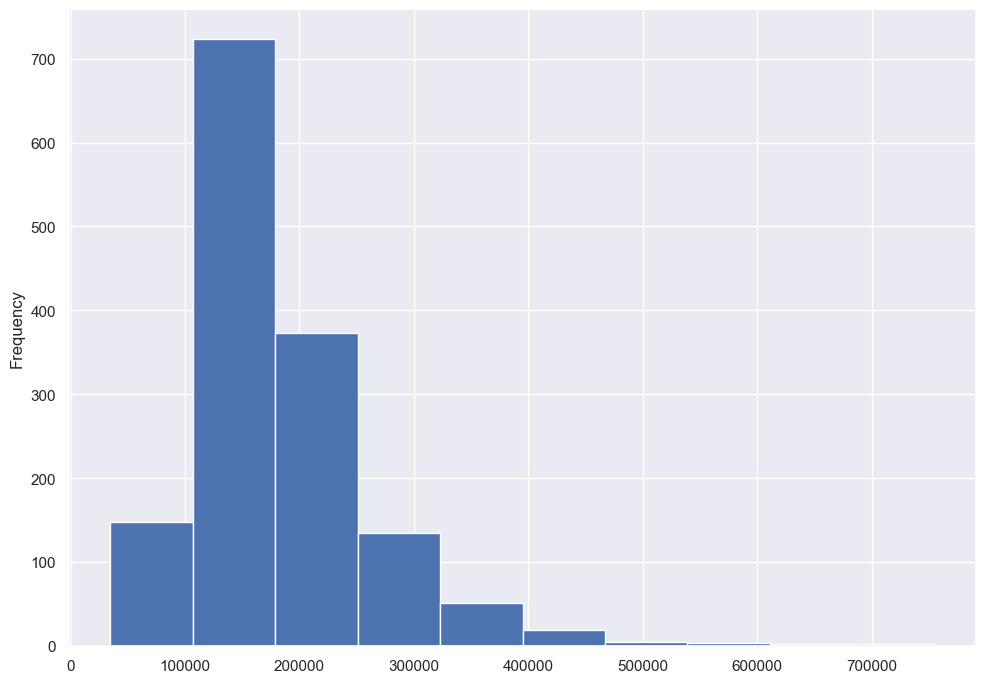

In [ ]:
train.SalePrice.plot.hist()

As we can see, our target attribute is scewed right, so we are applying log transformation

In [ ]:
train.SalePrice = np.log(train.SalePrice)

<Axes: ylabel='Frequency'>

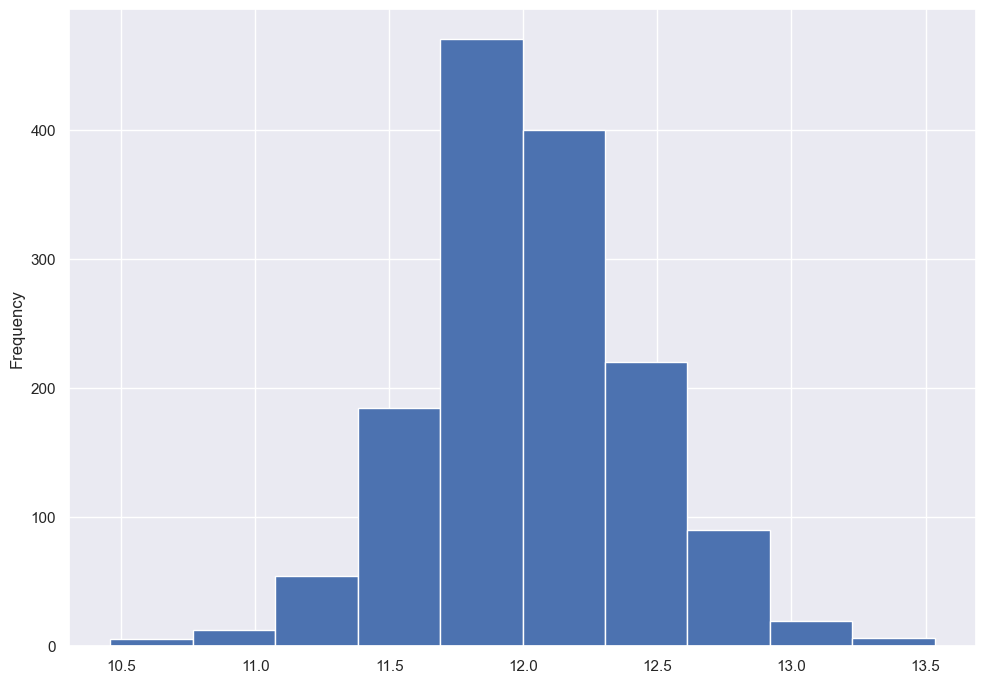

In [ ]:
train.SalePrice.plot.hist()

Looks much better!

Let`s concatenate train and test so to apply proper data preprocessing steps for the whole dataset

In [ ]:
ntrain = train.shape[0] #size of train set (will be needed later)
ntest = test.shape[0] #size of test set
y_train = train.SalePrice.values #define y_train
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)

Some data transformation

In [ ]:
chosen_num = chosen_num.to_list()
chosen_num.remove("SalePrice")

In [ ]:
df[chosen_num].skew()

MSSubClass        1.376165
LotFrontage       1.503278
LotArea          12.829025
OverallQual       0.197212
OverallCond       0.570605
YearBuilt        -0.600114
YearRemodAdd     -0.451252
MasVnrArea        2.602589
BsmtFinSF1        1.425722
BsmtFinSF2        4.147456
BsmtUnfSF         0.919824
TotalBsmtSF       1.162882
2ndFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         1.270010
BsmtFullBath      0.624062
BsmtHalfBath      3.932018
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr      4.304467
Fireplaces        0.733872
GarageCars       -0.218373
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
3SsnPorch        11.381914
ScreenPorch       3.948723
PoolArea         16.907017
MiscVal          21.958480
MoSold            0.195985
YrSold            0.132467
dtype: float64

In [ ]:
to_tr = df[chosen_num].skew()[df[chosen_num].skew()>1].index

In [ ]:
for col in to_tr:
    df[col]  = np.log1p(df[col]) #applying log(x+1) transformation

In [ ]:
df[chosen_num].skew()

MSSubClass        0.245284
LotFrontage      -0.857099
LotArea          -0.505010
OverallQual       0.197212
OverallCond       0.570605
YearBuilt        -0.600114
YearRemodAdd     -0.451252
MasVnrArea        0.524279
BsmtFinSF1       -0.617962
BsmtFinSF2        2.463138
BsmtUnfSF         0.919824
TotalBsmtSF      -4.983345
2ndFlrSF          0.862118
LowQualFinSF      8.562091
GrLivArea         0.013194
BsmtFullBath      0.624062
BsmtHalfBath      3.775149
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr      3.522161
Fireplaces        0.733872
GarageCars       -0.218373
WoodDeckSF        0.158114
OpenPorchSF      -0.041819
EnclosedPorch     1.962089
3SsnPorch         8.829794
ScreenPorch       2.947420
PoolArea         15.006047
MiscVal           5.216665
MoSold            0.195985
YrSold            0.132467
dtype: float64

Dealing with missing values

In [ ]:
chosen_att = chosen_num + chosen_cat.to_list()

In [1]:
df = df[chosen_att] #let`s only left the chosen attribute in data overview step

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   float64
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   float64
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2896 non-null   float64
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtUnfSF      2918 non-null   float64
 11  TotalBsmtSF    2918 non-null   float64
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   float64
 14  GrLivArea      2919 non-null   float64
 15  BsmtFullBath   2917 non-null   float64
 16  BsmtHalfBath   2917 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

nan values in FirePlaceQu means that there is no fireplace in house

In [ ]:
df["FireplaceQu"].fillna("None", inplace=True)

Nan in MasVnrArea and MasVnrType means that there is no veneer

In [ ]:
df["MasVnrType"].fillna("None", inplace=True)
df["MasVnrArea"].fillna(0, inplace=True)

In attribute related to basement nan values means there is no basement in the house

In [ ]:
basement_cat = ["BsmtExposure", "BsmtQual", "BsmtFinType1", 'BsmtFinType2', "BsmtCond"]
for att in basement_cat:
    df[att].fillna("None", inplace=True)
df["TotalBsmtSF"].fillna(0, inplace=True)

With the garage attributes situation is the same

In [ ]:
garage_cat = ["GarageFinish", "GarageType", "GarageCond", "GarageQual"]
for att in garage_cat:
    df[att].fillna("None", inplace=True)
df["GarageCars"].fillna(0, inplace=True)

In [ ]:
for att in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[att].fillna(0, inplace=True)

In [ ]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['PoolQC'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['Alley'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   float64
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   float64
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2919 non-null   float64
 8   BsmtFinSF1     2919 non-null   float64
 9   BsmtFinSF2     2919 non-null   float64
 10  BsmtUnfSF      2919 non-null   float64
 11  TotalBsmtSF    2919 non-null   float64
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   float64
 14  GrLivArea      2919 non-null   float64
 15  BsmtFullBath   2919 non-null   float64
 16  BsmtHalfBath   2919 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

All the attributes left with missing values have 1-4 Nan so i wll input them with the most frequnetly occured value

In [ ]:
for att in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    df[att].fillna(df[att].mode()[0], inplace=True)

Dealing with categorical attributes

In [ ]:
ordinal = ["PoolQC", "Condition2", "ExterCond", "Condition1", "BsmtExposure", "GarageCond", "BsmtFinType1", "HeatingQC", "GarageFinish", 'BsmtQual', "ExterQual", "FireplaceQu", "BsmtCond", "GarageQual",
          "SaleCondition", "HeatingQC", "KitchenQual", "OverallQual", "OverallCond", "BsmtFinType2"] #choosing ordinal attributes
one_hot = list(train.select_dtypes(include='object').columns)
for att in one_hot: #choosing attribute for one hot transformation
    if att in ordinal:
        one_hot.remove(att)
        print(att)
to_r = ['Condition2', 'ExterCond', 'BsmtFinType1', 'BsmtCond', 'GarageQual']
for i in to_r:
    one_hot.remove(i)

Condition1
ExterQual
BsmtQual
BsmtExposure
BsmtFinType2
HeatingQC
KitchenQual
FireplaceQu
GarageFinish
GarageCond
PoolQC
SaleCondition


In [ ]:
dummies = pd.get_dummies(df[one_hot]) # one hot transformation

In [ ]:
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.drop(columns= one_hot, inplace=True) #drop original columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder #ordinal encoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
df[ordinal] = ordinal_encoder.fit_transform(df[ordinal])

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

The last step of data preprocessing is dealing with outliers due to the fact that regression models are very
sensitive to them

In [ ]:
from sklearn.preprocessing import RobustScaler
df_out = df.copy()
transformer = RobustScaler()
df_out= transformer.fit_transform(df_out)

'for col in chosen_num[:9]:\n    Q3 = df[col].quantile(0.75)\n    Q1 = df[col].quantile(0.25)\n    IQR = Q3 - Q1\n    upper_cap = Q3+IQR*1.5\n    lower_cap = Q1-IQR*1.5\n    BM1 = df[col] > upper_cap\n    df_out.loc[df[BM1].index,col] = upper_cap\n    BM2 = df[col] < lower_cap\n    df_out.loc[df[BM2].index,col] = lower_cap'

Defining X_train, X_test along with X_train_out and X_test_out (_out sets were scaled)

In [ ]:
X_train = df[:ntrain]
X_test = df[ntrain:]
X_train_out = df_out[:ntrain]
X_test_out = df_out[ntrain:]

#Building a model

For this project I go with multiple regression models, and trying to combine their predictions

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint


In [ ]:
def model_rand(model, parameters, predictor=X_train,target=y_train): #custom randomized search cv and evaluation combination
  rand_search = RandomizedSearchCV(model, parameters, n_iter = 50, cv=5)
  rand_search.fit(predictor, target)
  best_model=rand_search.best_estimator_
  print("Best parameters:", best_model)
  scores  = -1 * cross_val_score(best_model, predictor, target, cv=5, scoring='neg_root_mean_squared_error')
  print("Cross-val scores : {}, mean :{}".format(scores, scores.mean()))
  return best_model
def model_grid(model, parameters, predictor=X_train,target=y_train): #custom grid search cv and evaluation combination
  grid_search = GridSearchCV(model, parameters,cv=5)
  grid_search.fit(predictor, target)
  best_model=grid_search.best_estimator_
  print("Best parameters:", best_model)
  scores  = -1 * cross_val_score(best_model, predictor, target, cv=10, scoring='neg_root_mean_squared_error')
  print("Cross-val scores : {}, mean :{}".format(scores, scores.mean()))
  return best_model



Firstly, XGBRegressor

In [ ]:
model_1 = XGBRegressor()
parameters_1 = {"n_estimators":randint(1800,3000), "learning_rate":uniform(0.01, 0.4), "max_depth":[3], "subsample":uniform(0.3, 0.4),
               "colsample_bytree":uniform(0.3, 0.7), "gamma":uniform(0.01, 0.99), "min_child_weight":uniform(0.5, 1.5), "reg_alpha":uniform(0.1,0.99), "reg_lambda":uniform(0.1,0.99)}
best_param = model_rand(model_1, parameters_1)

Best parameters: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8112445617692572, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.05190395071631897,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07418789887487288,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.5438379519587757, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2731,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Cross-val scores : [0.11224192 0.13784294 0.12835362 0.11091834 0.13475012], mean :0.12482138872883537


Lasso Regression

In [ ]:
model_3 = Lasso()
parameters_3 = {"alpha":[0.0005, 0.005,0.05,0.5,5]}
best_param_3 = model_grid(model_3, parameters_3, predictor=X_train_out)

Best parameters: Lasso(alpha=0.0005)
Cross-val scores : [0.10895788 0.09601183 0.10733011 0.15278512 0.14493396 0.10870975
 0.11864337 0.10370531 0.16277811 0.12074623], mean :0.12246016649842588


ElasticNet Regression

In [ ]:
model_4 = ElasticNet()
parameters_4 = {"alpha":[0.0005, 0.005,0.05,0.5,5]}
best_param_4 = model_grid(model_4, parameters_4, predictor=X_train_out)

Best parameters: ElasticNet(alpha=0.0005)
Cross-val scores : [0.10791746 0.09384909 0.10761567 0.15320713 0.14450004 0.10890291
 0.11809239 0.10519231 0.16091337 0.12461883], mean :0.12248092056279633


In [ ]:
xgbregressor = best_param.fit(X_train, y_train) #training models with the best hyperparameters
lasso = best_param_3.fit(X_train_out, y_train)
elastic = best_param_4.fit(X_train_out, y_train)

#Final Model Submission

In [ ]:
xgb_pred = np.exp(xgbregressor.predict(X_test)) #don`t forget that our target attribute was log transformed so we need to apply an inverse function
lasso_pred = np.exp(lasso.predict(X_test_out))
elastic_pred = np.exp(elastic.predict(X_test_out))

In [ ]:
stacked_pred = np.array([lasso_pred, elastic_pred, xgb_pred]) #predictions
mean_pred = np.mean(stacked_pred, axis=0)
mean_pred

array([121759.67913498, 152883.99910998, 178229.22018673, ...,
       161503.29552205, 118713.51023081, 228361.72327045])

In [ ]:
submissions= pd.DataFrame({"Id":list(range(1461, 2920)), "SalePrice":mean_pred}, index= X_test.index)

In [ ]:
submissions.to_csv("submissions_3.csv", index=False)